In [1]:
# =============================================================================
# Title: Assignment 2.2 - Graph Analysis with Matplotlib
# Author: Pankaj Yadav
# Date: 14 Dec 2025
# Modified By: Pankaj Yadav
# Description: Graph Analysis with Matplotlib on your choice of dataset
# =============================================================================

### 1. Using a data set of your choice, write an introduction explaining the data set.

In [3]:
import pandas as pd
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

This dataset contains information about 215 students who participated in a campus placement program in India. It records their academic performance at four different stages: 10th standard, 12th standard, undergraduate degree, and MBA. Along with marks and percentages, the data also includes details like gender, type of degree, specialisation, and whether the student had any work experience before joining the MBA.

Students in this dataset come from various backgrounds. In 12th standard, they studied Science, Commerce, or Arts. For their undergraduate degrees, they chose either Science & Technology or Commerce & Management. At the MBA level, students specialised in either Marketing & HR or Marketing & Finance.

The main focus of this dataset is on placements. Out of 215 students, 127 got placed (received job offers) and 88 did not. The salary offered to placed students ranges from ₹2,00,000 to ₹4,25,000 per year. For students who were not placed, the salary column is left blank (missing values). The dataset also tells us whether a student had any work experience before their MBA, which helps us understand if prior experience makes a difference in getting placed or getting a better salary.

Below is a table explaining each column in the dataset:

| Variable Name     | Description                                            |
|-------------------|--------------------------------------------------------|
| sl_no             | Serial Number                                          |
| gender            | Gender (M = male, F = female)                          |
| ssc_p             | 10th grade percentage                                  |
| ssc_b             | 10th grade examination board                           |
| hsc_p             | 12th grade percentage                                  |
| hsc_b             | 12th grade examination board                           |
| hsc_s             | 12th grade specialization                              |
| degree_p          | Undergraduate degree percentage                        |
| degree_t          | Undergraduate degree type                              |
| workex            | Work experience (Yes/No)                               |
| etest_p           | Entrance/selection test percentage for specialization  |
| specialisation    | MBA specialization                                     |
| mba_p             | MBA percentage                                         |
| status            | Placement status (Placed / Not Placed)                 |
| salary            | Salary offered (NaN if not placed)                     |


Below is the snapshot of the dataset using pandas.

In [5]:
#import csv file
df = pd.read_csv('/Users/pyadav/Documents/DSC550-T303/Assignments/Placement_Data_Full_Class - Placement_Data_Full_Class.csv')

df.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
# lets do some basic data analysis before cleaning it. Like check the data types of the columns 
print(df.dtypes)

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object


In [7]:
# Lets see if there are any missing values in the data
print(df.isnull().sum())

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


Above output shows that the salary column has missing values. This is not an issue as these are the students who were not placed during their master's programs, hence the salaries are missing.

In [9]:
# Lets replace the missing NaN values with Zeros.
df.fillna(0, inplace=True)

In [10]:
# Now let's check if there are any missing values in the data
print(df.isnull().sum())

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64


As you see now the missing values are gone for salary as well as they are replaced with Zeros. Now lets describe the data and check the basic statistics for numeric fields.

In [12]:
#describe the data 
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


The numeric features in the placement dataset reveal interesting patterns:

Qualitative:
- All numeric fields are complete with 215 valid records
- No extreme outliers detected in academic metrics (scores range 37-98%)
- Salary maximum of ₹940,000 appears anomalous and warrants further investigation

insights:

- Students maintain relatively consistent performance across education levels, with mean percentages around 66-67% for SSC, HSC, and undergraduate degrees
- MBA performance (mean: 62.28%) shows slight variation, suggesting increased difficulty at the postgraduate level
- Entrance test scores (mean: 72.1%) are notably higher than other academic metrics, indicating selective admission criteria
- The mean salary of 198,702 is skewed by unplaced students (67 entries with ₹0), inflating the dataset
- Median salary of 240,000 better represents placed students' actual compensation
- Wide salary range (0-940,000) with high standard deviation (154,781) reflects significant variation in placement outcomes and offers
- The 25th percentile at ₹0 confirms the substantial proportion of unplaced candidates in the dataset


### 2. Identify a question or question(s) that you would like to explore in your data set.

The questions we will be working on are:
1. What factors most strongly influence a student's placement status (Placed vs. Not Placed)?
2. Are there significant differences in placement rates or salaries based on gender?

### 3. Create at least three graphs that help answer these questions. Make sure your graphs are clearly readable and are labeled appropriately and professionally.

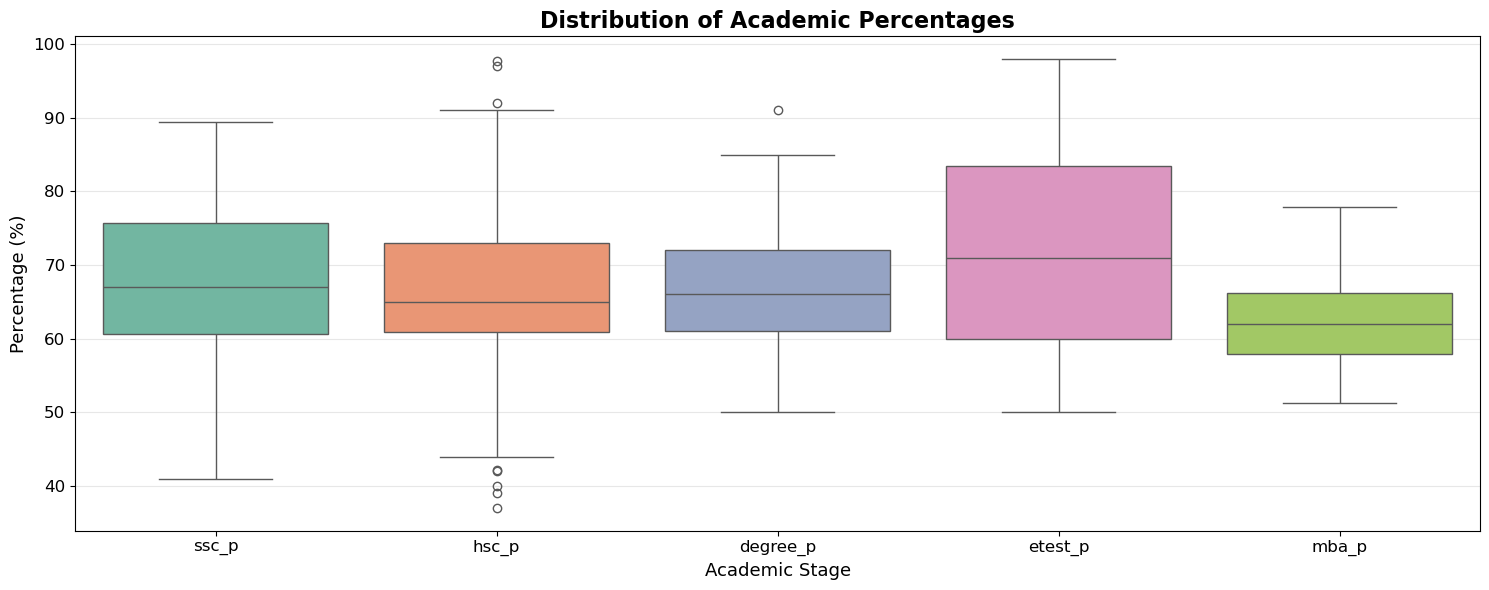

In [17]:
#Before we start answering questions, let's understand the data better and do some exploratory data analysis.
#Lets quickly check for outliers using box plots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']], palette='Set2')
plt.title('Distribution of Academic Percentages', fontsize=16, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=13)
plt.xlabel('Academic Stage', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

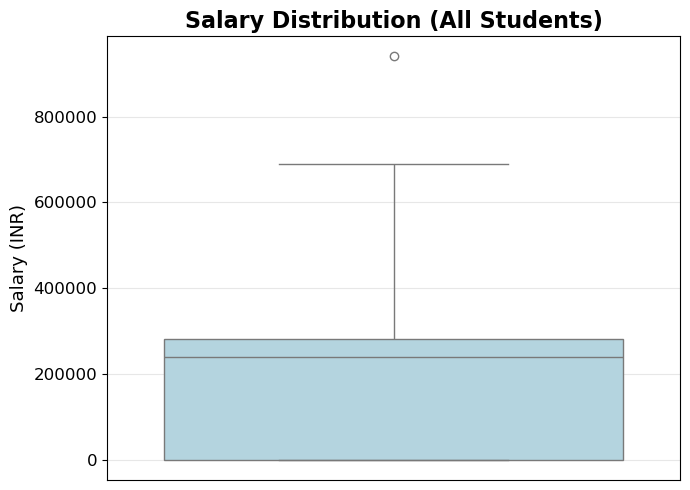

In [18]:
# Boxplot for salary including all rows
plt.figure(figsize=(7, 5))
sns.boxplot(y=df['salary'], color='lightblue')
plt.title('Salary Distribution (All Students)', fontsize=16, fontweight='bold')
plt.ylabel('Salary (INR)', fontsize=13)
plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### Iterpretation of above boxplots:

For percentages in HSC, SSC, Degree Etest and MBA, the boxplots for these columns shows that the most student scores are clustered in the middle range, with a few students scoring much higher or lower.
For hsc_p and degree_p, there are some outliers at both the lower and upper ends, indicating a few students with unusually low or high scores.The median (green line) is roughly centered in most boxes, suggesting a relatively symmetric distribution for most features.

Salary on the other hand shows a large number of outliers in the higher side. This indicates that when most of the students have salaries between 200K to 400K, there are some students who recieved much higher salaries. The presence of many outliers in upper whisker suggests that the salaries data will be right skewed and a few students will be earning salaries much higher than the majority of students. Also, as rows with unplaced student having NaN values were replaced with zero, the data is skewed because of that.

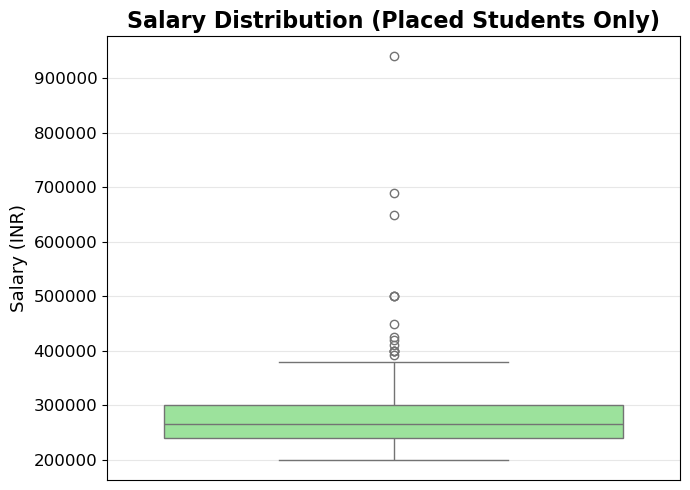

In [20]:
#Les see what are the salaries with excluding zeros (only placed students)
plt.figure(figsize=(7, 5))
sns.boxplot(y=df[df['salary'] > 0]['salary'], color='lightgreen')
plt.title('Salary Distribution (Placed Students Only)', fontsize=16, fontweight='bold')
plt.ylabel('Salary (INR)', fontsize=13)
plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Now after removing unplaced students you can see the salaries are mostly concentrated between 200K and 390K with a median around 240K. 
However, several outliers above 400,000 reveal that top-performing students secure significantly higher salary packages than the majority.

### Lets start building graphs to find answers to our questions

1. **What factors most strongly influence a student's placement status (Placed vs. Not Placed)?**

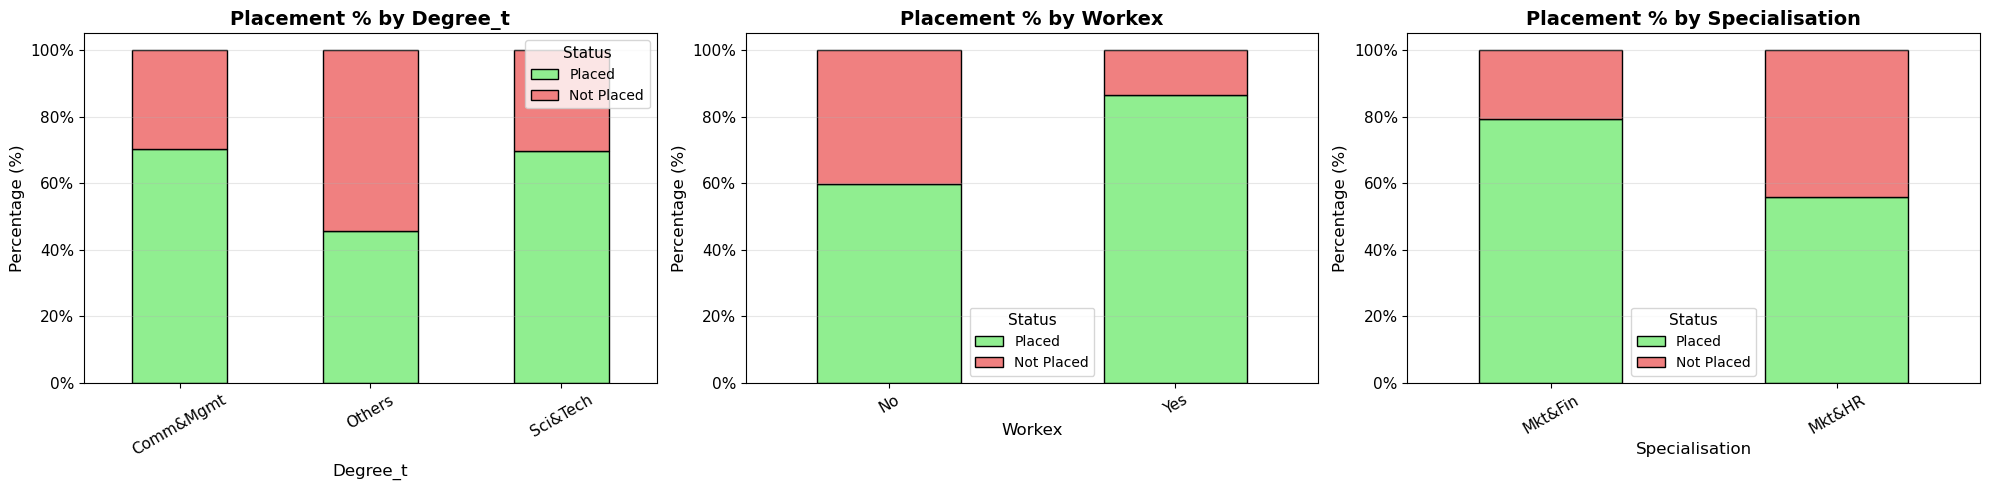

In [24]:
# Lets see if placement Status is affected by Work Experience , Degree type Gender and Specialisation


# Categorical features: proportion placed


cat_features = [ 'degree_t', 'workex', 'specialisation']
fig, axes = plt.subplots(1, len(cat_features), figsize=(20, 5))
for i, col in enumerate(cat_features):
    cat_df = df.groupby([col, 'status']).size().unstack().fillna(0)
    cat_df = cat_df.div(cat_df.sum(axis=1), axis=0) * 100
    cat_df[['Placed', 'Not Placed']].plot(
        kind='bar', stacked=True, ax=axes[i],
        color=['lightgreen', 'lightcoral'], edgecolor='black'
    )
    axes[i].set_title(f'Placement % by {col.capitalize()}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Percentage (%)', fontsize=12)
    axes[i].set_xlabel(col.capitalize(), fontsize=12)
    axes[i].legend(title='Status', fontsize=10, title_fontsize=11)
    axes[i].yaxis.set_major_formatter(mtick.PercentFormatter())
    axes[i].tick_params(axis='x', labelrotation=30, labelsize=11)
    axes[i].tick_params(axis='y', labelsize=11)
    axes[i].grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### Interpretation:

The stacked bar plots compare the percentage of students placed vs. not placed across key categorical features:

Degree Type:
Students with a background in Science & Technology (STEM) or Commerce & Management which is realted to Accounting related activites have higher placement rates compared to those in "Others." The "Others" group has a notably higher proportion of students not placed.

Work Experience:
Students with prior work experience ("Yes") have a much higher placement rate (over 85%) compared to those without experience, where the not placed percentage is much higher. This suggests work experience is a strong positive factor for placement.

Specialization:
Students specializing in Marketing & Finance have a higher placement rate than those in Marketing & HR, indicating that specialization may influence placement outcomes.

Work experience and degree type are the strongest differentiators for placement success, followed by specialization. Students with work experience, a Science/Tech or Commerce/Mgmt degree, and a Marketing & Finance specialization are most likely to be placed.

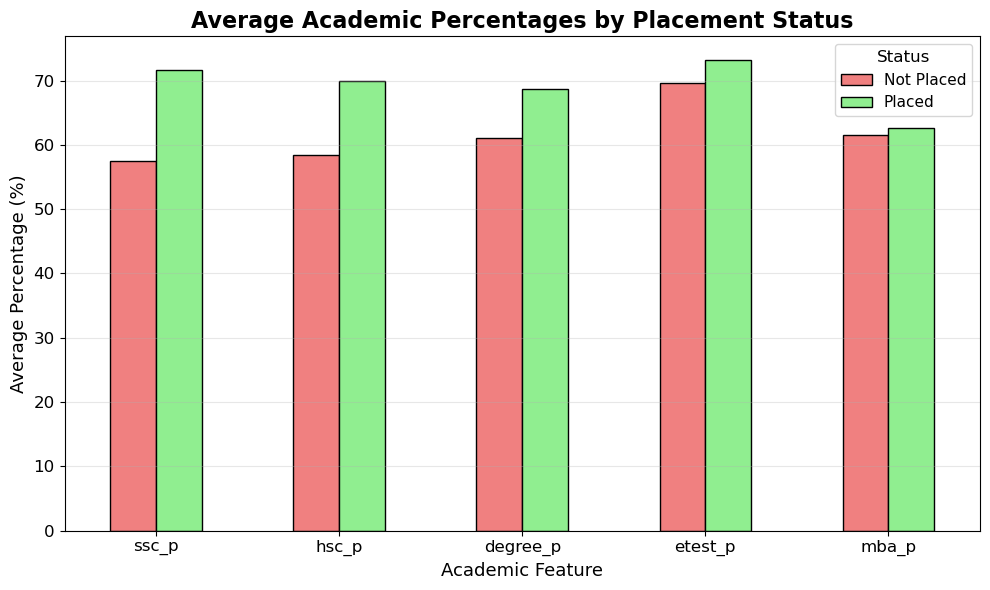

In [26]:
# Numeric features: mean by placement status
means = df.groupby('status')[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].mean().T
means.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Average Academic Percentages by Placement Status', fontsize=16, fontweight='bold')
plt.ylabel('Average Percentage (%)', fontsize=13)
plt.xlabel('Academic Feature', fontsize=13)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(title='Status', fontsize=11, title_fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Consistently higher academic scores across all stages are linked to better placement outcomes. Academic excellence, especially in earlier education and entrance tests, appears to be a strong factor in securing placement.

****

2. **Are there significant differences in placement rates or salaries based on gender?**

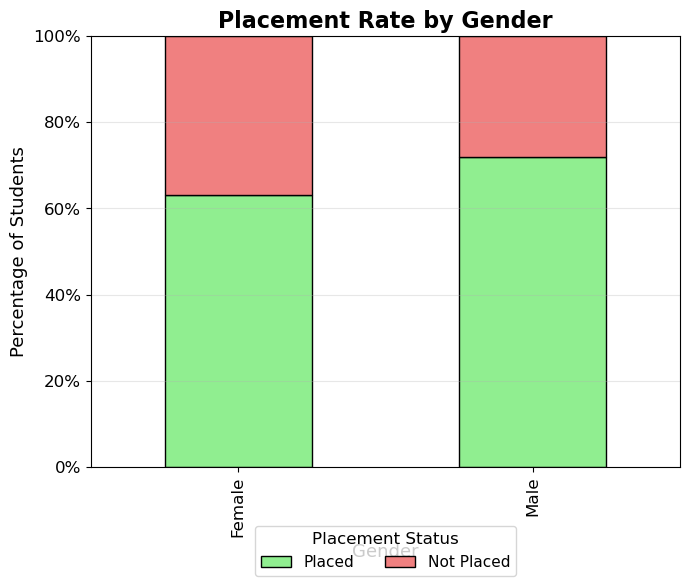

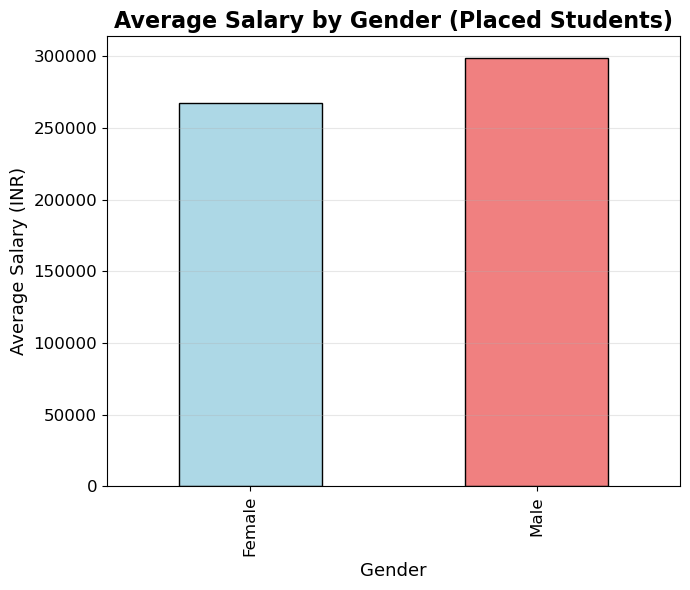

In [30]:
# Placement Rate by Gender (Stacked Bar)
plt.figure(figsize=(7, 6))
gender_placement = pd.crosstab(df['gender'], df['status'], normalize='index') * 100
gender_placement[['Placed', 'Not Placed']].plot(
    kind='bar', stacked=True, color=['lightgreen', 'lightcoral'], ax=plt.gca(), edgecolor='black'
)
plt.title('Placement Rate by Gender', fontsize=16, fontweight='bold')
plt.ylabel('Percentage of Students', fontsize=13)
plt.xlabel('Gender', fontsize=13)
plt.legend(title='Placement Status', fontsize=11, title_fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Average Salary by Gender (Placed Students Only)
plt.figure(figsize=(7, 6))
placed = df[df['status'] == 'Placed']
avg_salary = placed.groupby('gender')['salary'].mean()
avg_salary.plot(kind='bar', color=['lightblue', 'lightcoral'], edgecolor='black')
plt.title('Average Salary by Gender (Placed Students)', fontsize=16, fontweight='bold')
plt.ylabel('Average Salary (INR)', fontsize=13)
plt.xlabel('Gender', fontsize=13)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

The stacked bar plot (top) shows that both male and female students have a majority placed, but the placement rate is slightly higher for males (about 72%) compared to females (about 64%). This indicates a modest gender gap in placement rates, with males being placed at a higher rate than females.

Among students who were placed, the average salary for males is higher than for females. This suggests that not only are males placed at a higher rate, but they also tend to receive higher salary offers compared to their female counterparts.

There are significant differences in both placement rates and average salaries based on gender, with males having an advantage in both metrics in this dataset.

#### **Conclusion**

Through comprehensive analysis and visualization of the placement dataset, several key insights emerged:

Academic performance is a strong predictor of placement success. Students who were placed consistently had higher average scores across all academic stages, especially in earlier education and entrance tests.
Work experience significantly increases the likelihood of being placed, highlighting the value of prior professional exposure. Degree type and MBA specialization also influence placement rates. Students from Science & Technology or Commerce & Management backgrounds, and those specializing in Marketing & Finance, had higher placement rates.

Gender differences are evident from the data. Males not only have a higher placement rate but also receive higher average salary offers compared to females.
Salary distribution among placed students is right-skewed, with most offers between 200K and 390K, but a few students receive much higher salaries.
Overall, strong academic credentials, relevant degree/specialization, and prior work experience are the most important factors for successful placement and higher salary offers. However, the observed gender gap in both placement rates and salaries suggests that further investigation into potential biases or structural barriers may be warranted.